##### 9. Fit a lag-5 autoregressive model to the NYSE data, as described in the text and Lab 10.9.6. Refit the model with a 12-level factor representing the month. Does this factor improve the performance of the model?

In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data

In [2]:
df = load_data('NYSE')
df

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True
...,...,...,...,...,...
1986-12-24,wed,0.006514,-0.236104,-9.807366,False
1986-12-26,fri,0.001825,-1.322425,-9.906025,False
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False


In [3]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1962-12-03', '1962-12-04', '1962-12-05', '1962-12-06',
               '1962-12-07', '1962-12-10', '1962-12-11', '1962-12-12',
               '1962-12-13', '1962-12-14',
               ...
               '1986-12-17', '1986-12-18', '1986-12-19', '1986-12-22',
               '1986-12-23', '1986-12-24', '1986-12-26', '1986-12-29',
               '1986-12-30', '1986-12-31'],
              dtype='datetime64[ns]', name='date', length=6051, freq=None)

In [4]:
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)
df

,DJ_return,log_volume,log_volatility,train,day_of_week_mon,day_of_week_thur,day_of_week_tues,day_of_week_wed
date,,,,,,,,
1962-12-03,-0.004461,0.032573,-13.127403,True,1,0,0,0
1962-12-04,0.007813,0.346202,-11.749305,True,0,0,1,0
1962-12-05,0.003845,0.525306,-11.665609,True,0,0,0,1
1962-12-06,-0.003462,0.210182,-11.626772,True,0,1,0,0
1962-12-07,0.000568,0.044187,-11.728130,True,0,0,0,0
...,...,...,...,...,...,...,...,...
1986-12-24,0.006514,-0.236104,-9.807366,False,0,0,0,1
1986-12-26,0.001825,-1.322425,-9.906025,False,0,0,0,0
1986-12-29,-0.009515,-0.371237,-9.827660,False,1,0,0,0


In [5]:
df_lag5 = df.copy()
for i in range(1, 6):
    df_lag5[f'DJ_return_lag_{i}'] = df['DJ_return'].shift(i)
    df_lag5[f'log_volume_lag_{i}'] = df['log_volume'].shift(i)
    df_lag5[f'log_volatility_lag_{i}'] = df['log_volatility'].shift(i)

In [6]:
df_lag5 = df_lag5.dropna()
df_lag5

,DJ_return,log_volume,log_volatility,train,day_of_week_mon,day_of_week_thur,day_of_week_tues,day_of_week_wed,DJ_return_lag_1,log_volume_lag_1,...,log_volatility_lag_2,DJ_return_lag_3,log_volume_lag_3,log_volatility_lag_3,DJ_return_lag_4,log_volume_lag_4,log_volatility_lag_4,DJ_return_lag_5,log_volume_lag_5,log_volatility_lag_5
date,,,,,,,,,,,,,,,,,,,,,
1962-12-10,-0.010824,0.133246,-10.872526,True,1,0,0,0,0.000568,0.044187,...,-11.626772,0.003845,0.525306,-11.665609,0.007813,0.346202,-11.749305,-0.004461,0.032573,-13.127403
1962-12-11,0.000124,-0.011528,-10.977797,True,0,0,1,0,-0.010824,0.133246,...,-11.728130,-0.003462,0.210182,-11.626772,0.003845,0.525306,-11.665609,0.007813,0.346202,-11.749305
1962-12-12,0.003358,0.001607,-11.012360,True,0,0,0,1,0.000124,-0.011528,...,-10.872526,0.000568,0.044187,-11.728130,-0.003462,0.210182,-11.626772,0.003845,0.525306,-11.665609
1962-12-13,-0.003296,-0.106437,-11.047108,True,0,1,0,0,0.003358,0.001607,...,-10.977797,-0.010824,0.133246,-10.872526,0.000568,0.044187,-11.728130,-0.003462,0.210182,-11.626772
1962-12-14,0.004469,-0.138269,-11.022063,True,0,0,0,0,-0.003296,-0.106437,...,-11.012360,0.000124,-0.011528,-10.977797,-0.010824,0.133246,-10.872526,0.000568,0.044187,-11.728130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,0.006514,-0.236104,-9.807366,False,0,0,0,1,-0.006150,0.450780,...,-9.746214,0.008345,0.986704,-9.644138,-0.002866,0.025079,-9.652473,-0.009262,-0.043366,-9.559975
1986-12-26,0.001825,-1.322425,-9.906025,False,0,0,0,0,0.006514,-0.236104,...,-9.782214,-0.001385,0.366152,-9.746214,0.008345,0.986704,-9.644138,-0.002866,0.025079,-9.652473
1986-12-29,-0.009515,-0.371237,-9.827660,False,1,0,0,0,0.001825,-1.322425,...,-9.807366,-0.006150,0.450780,-9.782214,-0.001385,0.366152,-9.746214,0.008345,0.986704,-9.644138


In [7]:
df_train = df_lag5.where(df_lag5['train'] == True).dropna()
df_test = df_lag5.where(df_lag5['train'] == False).dropna()

In [8]:
df_train.shape, df_test.shape

((4276, 23), (1770, 23))

In [9]:
cols = ['DJ_return', 'log_volume', 'log_volatility', 'train']
x_train = df_train.drop(columns=cols)
y_train = df_train['log_volume']

In [10]:
x_test = df_test.drop(columns=cols)
y_test = df_test['log_volume']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
model = LinearRegression().fit(x_train, y_train)
print('R^2:', model.score(x_test, y_test))
print('MSE:', MSE(y_test, model.predict(x_test)))

R^2: 0.459556313305327
MSE: 0.03109207232975763


Text(0.5, 0, 'Date')

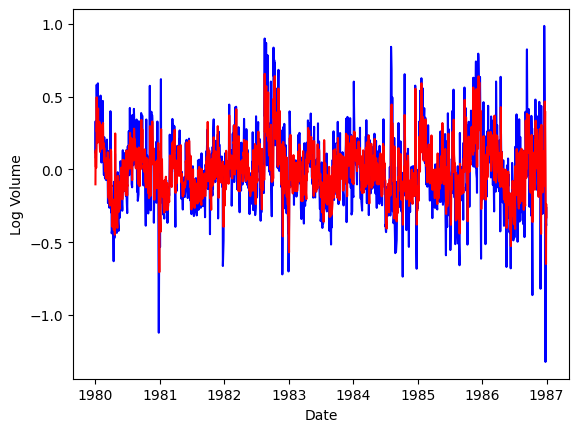

In [12]:
import matplotlib.pyplot as plt
yhat = model.predict(x_test)
plt.plot(df_test.index, y_test, label='True', color='blue')
plt.plot(df_test.index, yhat, label='Predicted', color='r')
plt.ylabel('Log Volume')
plt.xlabel('Date')

### Refitting with 12-level factor representing month:

In [13]:
df_lag12 = df.copy()
for i in range(1, 13):
    df_lag12[f'DJ_return_lag_{i}'] = df_lag12['DJ_return'].shift(i*30)
    df_lag12[f'log_volume_lag_{i}'] = df_lag12['log_volume'].shift(i*30)
    df_lag12[f'log_volatility_lag_{i}'] = df_lag12['log_volatility'].shift(i*30)


In [14]:
df_lag12

,DJ_return,log_volume,log_volatility,train,day_of_week_mon,day_of_week_thur,day_of_week_tues,day_of_week_wed,DJ_return_lag_1,log_volume_lag_1,...,log_volatility_lag_9,DJ_return_lag_10,log_volume_lag_10,log_volatility_lag_10,DJ_return_lag_11,log_volume_lag_11,log_volatility_lag_11,DJ_return_lag_12,log_volume_lag_12,log_volatility_lag_12
date,,,,,,,,,,,,,,,,,,,,,
1962-12-03,-0.004461,0.032573,-13.127403,True,1,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-04,0.007813,0.346202,-11.749305,True,0,0,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-05,0.003845,0.525306,-11.665609,True,0,0,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-06,-0.003462,0.210182,-11.626772,True,0,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-12-07,0.000568,0.044187,-11.728130,True,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,0.006514,-0.236104,-9.807366,False,0,0,0,1,0.001932,-0.143266,...,-9.866092,0.000577,0.328175,-10.008741,-0.001860,-0.146502,-10.814870,-0.004303,0.548837,-10.375618
1986-12-26,0.001825,-1.322425,-9.906025,False,0,0,0,0,-0.001187,-0.092544,...,-9.787731,-0.000329,0.226164,-10.113834,-0.000671,-0.189698,-10.917745,-0.002155,0.210498,-10.464567
1986-12-29,-0.009515,-0.371237,-9.827660,False,1,0,0,0,-0.016774,0.221493,...,-9.891862,-0.003439,-0.256245,-10.187267,0.007409,-0.111907,-10.733140,0.003486,0.128660,-10.523694


In [15]:
df_lag12.dropna(inplace=True)
df_lag12

,DJ_return,log_volume,log_volatility,train,day_of_week_mon,day_of_week_thur,day_of_week_tues,day_of_week_wed,DJ_return_lag_1,log_volume_lag_1,...,log_volatility_lag_9,DJ_return_lag_10,log_volume_lag_10,log_volatility_lag_10,DJ_return_lag_11,log_volume_lag_11,log_volatility_lag_11,DJ_return_lag_12,log_volume_lag_12,log_volatility_lag_12
date,,,,,,,,,,,,,,,,,,,,,
1964-05-08,-0.001929,-0.088403,-10.922965,True,0,0,0,0,0.003376,0.115830,...,-10.486479,-0.011787,-0.043604,-10.051029,0.017552,0.077311,-8.933409,-0.004461,0.032573,-13.127403
1964-05-11,-0.001812,-0.176171,-11.008304,True,1,0,0,0,-0.000760,0.165460,...,-10.526228,-0.004869,-0.092720,-10.097123,0.005932,0.281560,-9.009564,0.007813,0.346202,-11.749305
1964-05-12,0.000375,-0.027355,-11.112723,True,0,0,1,0,-0.002456,0.025519,...,-10.629857,0.011035,-0.167947,-9.918517,-0.000684,0.182834,-9.114499,0.003845,0.525306,-11.665609
1964-05-13,-0.001936,0.094854,-11.190564,True,0,0,0,1,0.003425,0.061123,...,-10.731142,0.000180,-0.276907,-10.023804,0.004036,0.028916,-9.203547,-0.003462,0.210182,-11.626772
1964-05-14,-0.001612,-0.126423,-11.275227,True,0,1,0,0,0.005852,0.275407,...,-10.793294,0.001378,-0.333358,-10.124417,0.000429,0.187155,-9.308703,0.000568,0.044187,-11.728130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,0.006514,-0.236104,-9.807366,False,0,0,0,1,0.001932,-0.143266,...,-9.866092,0.000577,0.328175,-10.008741,-0.001860,-0.146502,-10.814870,-0.004303,0.548837,-10.375618
1986-12-26,0.001825,-1.322425,-9.906025,False,0,0,0,0,-0.001187,-0.092544,...,-9.787731,-0.000329,0.226164,-10.113834,-0.000671,-0.189698,-10.917745,-0.002155,0.210498,-10.464567
1986-12-29,-0.009515,-0.371237,-9.827660,False,1,0,0,0,-0.016774,0.221493,...,-9.891862,-0.003439,-0.256245,-10.187267,0.007409,-0.111907,-10.733140,0.003486,0.128660,-10.523694


In [16]:
df_train = df_lag12.where(df_lag12['train'] == True).dropna()
df_test = df_lag12.where(df_lag12['train'] == False).dropna()

In [17]:
df_train.shape, df_test.shape

((3921, 44), (1770, 44))

In [18]:
x_train = df_train.drop(columns=cols)
x_test = df_test.drop(columns=cols)
y_train = df_train['log_volatility']
y_test = df_test['log_volatility']

In [19]:
model.fit(x_train, y_train)
yhat = model.predict(x_test)
print('R^2:', model.score(x_test, y_test))
print('MSE:', MSE(y_test, yhat))

R^2: 0.12738594429783867
MSE: 0.2440368486909541


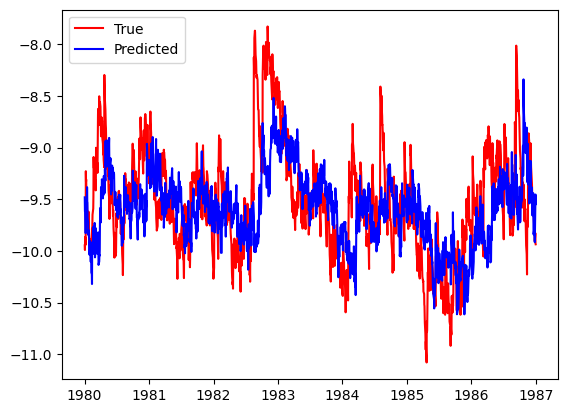

In [20]:
plt.plot(df_test.index, y_test, color='r', label='True')
plt.plot(df_test.index, yhat, color='blue', label='Predicted')
plt.legend()

much worse than 5 day lag

### 10. In Section 10.9.6, we showed how to ft a linear AR model to the NYSE data using the LinearRegression() function. However, we also mentioned that we can “fatten” the short sequences produced for the RNN model in order to ft a linear AR model. Use this latter approach to ft a linear AR model to the NYSE data. Compare the test R2 of this linear AR model to that of the linear AR model that we fit in the lab. What are the advantages/disadvantages of each approach?

In [21]:
import torch
from torch import nn
from ISLP.torch import SimpleDataModule, SimpleModule, ErrorTracker
from pytorch_lightning.loggers import CSVLogger

class LinearAR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
    
    def forward(self, x):
        return torch.flatten(self.linear(x)[:, -1])

In [22]:
df_lag5.columns

Index(['DJ_return', 'log_volume', 'log_volatility', 'train', 'day_of_week_mon',
       'day_of_week_thur', 'day_of_week_tues', 'day_of_week_wed',
       'DJ_return_lag_1', 'log_volume_lag_1', 'log_volatility_lag_1',
       'DJ_return_lag_2', 'log_volume_lag_2', 'log_volatility_lag_2',
       'DJ_return_lag_3', 'log_volume_lag_3', 'log_volatility_lag_3',
       'DJ_return_lag_4', 'log_volume_lag_4', 'log_volatility_lag_4',
       'DJ_return_lag_5', 'log_volume_lag_5', 'log_volatility_lag_5'],
      dtype='object')

In [23]:
lag_columns = [col for col in df_lag5.columns if 'lag' in col]

# Sort the lag column names in descending order
sorted_lag_columns = sorted(lag_columns, key=lambda x: int(x.split('_')[-1]), reverse=True)

# Reorder the DataFrame columns
df_lag5 = df_lag5[['DJ_return', 'log_volume', 'log_volatility', 'train', 'day_of_week_mon',
         'day_of_week_thur', 'day_of_week_tues', 'day_of_week_wed'] + sorted_lag_columns]
df_lag5.columns

Index(['DJ_return', 'log_volume', 'log_volatility', 'train', 'day_of_week_mon',
       'day_of_week_thur', 'day_of_week_tues', 'day_of_week_wed',
       'DJ_return_lag_5', 'log_volume_lag_5', 'log_volatility_lag_5',
       'DJ_return_lag_4', 'log_volume_lag_4', 'log_volatility_lag_4',
       'DJ_return_lag_3', 'log_volume_lag_3', 'log_volatility_lag_3',
       'DJ_return_lag_2', 'log_volume_lag_2', 'log_volatility_lag_2',
       'DJ_return_lag_1', 'log_volume_lag_1', 'log_volatility_lag_1'],
      dtype='object')

In [24]:
df_train = df_lag5.where(df_lag5['train'] == True).dropna()
df_test = df_lag5.where(df_lag5['train'] == False).dropna()

x_train = df_train.drop(columns=cols+['day_of_week_mon','day_of_week_tues','day_of_week_wed','day_of_week_thur'])
y_train = df_train['log_volume']

x_test = df_test.drop(columns=cols+['day_of_week_mon','day_of_week_tues','day_of_week_wed','day_of_week_thur'])
y_test = df_test['log_volume']

In [25]:
x_train.values.shape

(4276, 15)

In [26]:
print("Before reshape:", x_train.shape)
x_train = x_train.to_numpy().reshape((-1, 5, 3))
print("After reshape:", x_train.shape)

Before reshape: (4276, 15)
After reshape: (4276, 5, 3)


In [27]:
print("Before reshape:", x_test.shape)
x_test = x_test.to_numpy().reshape((-1, 5, 3))
print("After reshape:", x_test.shape)

Before reshape: (1770, 15)
After reshape: (1770, 5, 3)


In [28]:
x_train.shape, x_test.shape

((4276, 5, 3), (1770, 5, 3))

In [29]:
x_train_t = torch.tensor(x_train.astype(np.float32))
y_train_t = torch.tensor(y_train.values.astype(np.float32))

In [30]:
x_test_t = torch.tensor(x_test.astype(np.float32))
y_test_t = torch.tensor(y_test.values.astype(np.float32))

In [31]:
from torch.utils.data import TensorDataset
df_train = TensorDataset(x_train_t, y_train_t)

In [32]:
df_test = TensorDataset(x_test_t, y_test_t)

In [33]:
from torchinfo import summary
model = LinearAR()
summary(model, input_data=x_train_t, col_names=['input_size', 'output_size'])

Layer (type:depth-idx)                   Input Shape               Output Shape
LinearAR                                 [4276, 5, 3]              [4276]
├─Linear: 1-1                            [4276, 5, 3]              [4276, 5, 1]
Total params: 4
Trainable params: 4
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.26
Forward/backward pass size (MB): 0.17
Params size (MB): 0.00
Estimated Total Size (MB): 0.43

In [34]:
from torch.optim import RMSprop
from torchmetrics import R2Score
logger = CSVLogger('logs', 'NYSE AR')
data_module = SimpleDataModule(df_train, df_test, batch_size=64, num_workers=4)
optimizer = RMSprop(model.parameters(), lr=0.01)
module = SimpleModule.regression(model, metrics={'r2' : R2Score()}, optimizer=optimizer)

In [35]:
from pytorch_lightning import Trainer
trainer = Trainer(deterministic=True, max_epochs=200, callbacks=([ErrorTracker()]))
trainer.fit(module, datamodule=data_module)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type     | Params
-----------------------------------
0 | model | LinearAR | 4     
1 | loss  | MSELoss  | 0     
-----------------------------------
4         Trainable params
0         Non-trainable params
4         Total params
0.000     Total estimated model params si

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:104: Total length of `DataLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [36]:
trainer.test(module, datamodule=data_module)

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.03876423090696335
         test_r2            0.3261985182762146
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.03876423090696335, 'test_r2': 0.3261985182762146}]

In [37]:
model.eval()
yhat = model(x_test_t)
yhat = yhat.detach().numpy()

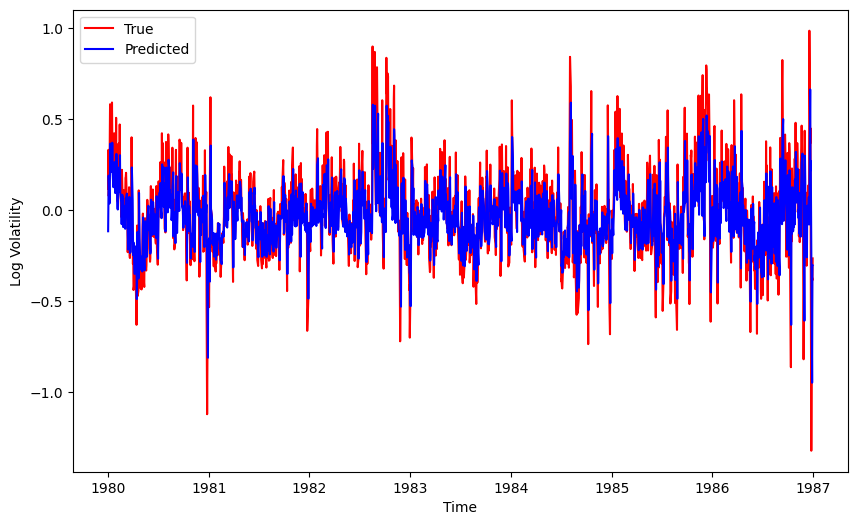

In [38]:
x = df.index.where(df['train'] == False).dropna()
plt.figure(figsize=(10, 6))
plt.plot(x, y_test, color='r', label='True')
plt.plot(x, yhat, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Log Volatility')
plt.legend()
plt.show()